# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Model_Accuracies = {}
Confusion_Matrix_main = {}
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

# Logsitic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score
Confusion_Matrix_main["Logistic Regression"] = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9562043795620438


In [8]:
from sklearn.model_selection import cross_val_score
Model_Accuracies["Logistic Regression"] = cross_val_score(estimator = classifier, X = X_train, y = y_train,cv = 10).mean()*100

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score
Confusion_Matrix_main["K Nearest Neighbors"] = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9708029197080292


In [12]:
from sklearn.model_selection import cross_val_score
Model_Accuracies["K Nearest Neighbors"] = cross_val_score(estimator = classifier, X = X_train, y = y_train,cv = 10).mean()*100


# Kernel SVM

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train,y_train)

SVC()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
Confusion_Matrix_main['Kernel SVM'] = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9635036496350365


In [16]:
from sklearn.model_selection import cross_val_score
Model_Accuracies['Kernel SVM'] = cross_val_score(estimator = classifier, X = X_train,y=y_train,cv =10).mean()*100

# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
Confusion_Matrix_main['Naive Bayes'] = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.948905109489051


In [20]:
from sklearn.model_selection import cross_val_score
Model_Accuracies['Naive Bayes'] = cross_val_score(estimator = classifier, X = X_train,y=y_train,cv =10).mean()*100

# Decision Tree Classification

In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
Confusion_Matrix_main['Decision Tree'] = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9416058394160584


In [24]:
from sklearn.model_selection import cross_val_score
Model_Accuracies['Decision Tree'] = cross_val_score(estimator = classifier, X = X_train,y=y_train,cv =10).mean()*100

In [25]:
Model_Accuracies

{'Logistic Regression': 96.70033670033669,
 'K Nearest Neighbors': 97.43771043771042,
 'Kernel SVM': 96.88888888888889,
 'Naive Bayes': 96.52188552188554,
 'Decision Tree': 95.23905723905723}

# Random Forest (ENSEMBLE)

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
Confusion_Matrix_main['Random Forest'] = confusion_matrix(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

0.9708029197080292


In [51]:
from sklearn.model_selection import cross_val_score
Model_Accuracies['Random Forest'] = cross_val_score(estimator = classifier, X = X_train,y=y_train,cv =10).mean()*100

# **Accuracies & Confusion Matrix**

<BarContainer object of 6 artists>

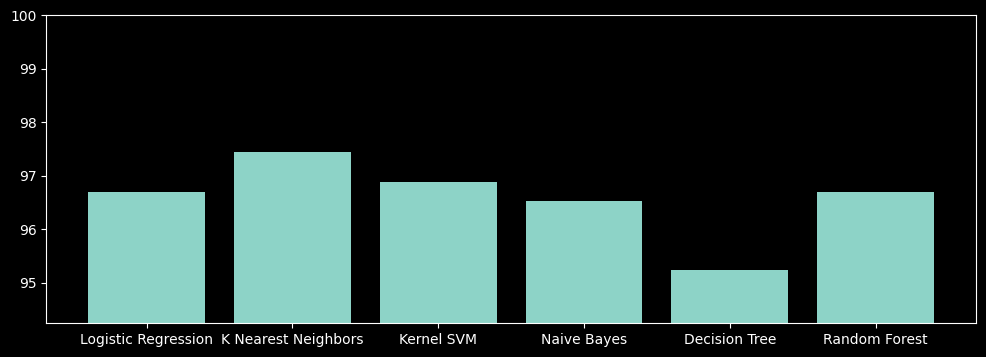

In [81]:
plt.style.use('dark_background')
plt.figure(figsize = (12,4))
plt.ylim(np.min(list(Model_Accuracies.values())) -1,100)
plt.bar(Model_Accuracies.keys(),Model_Accuracies.values())

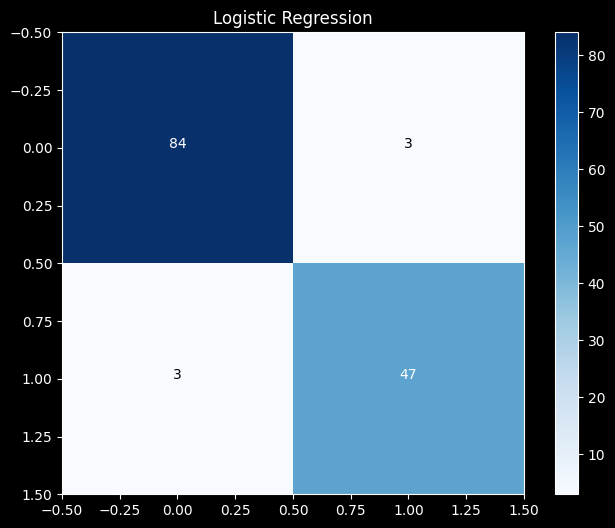

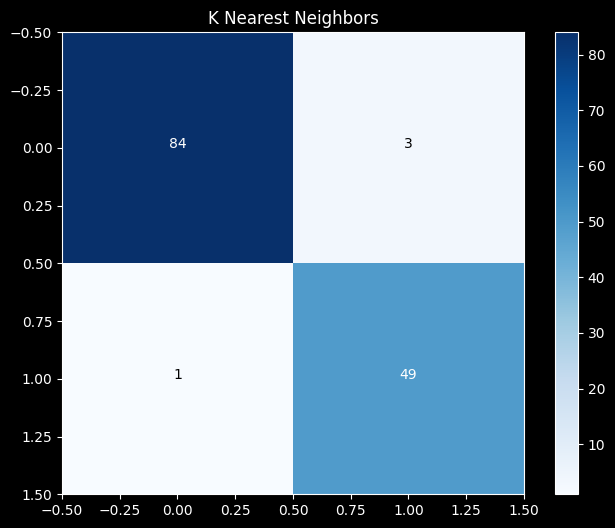

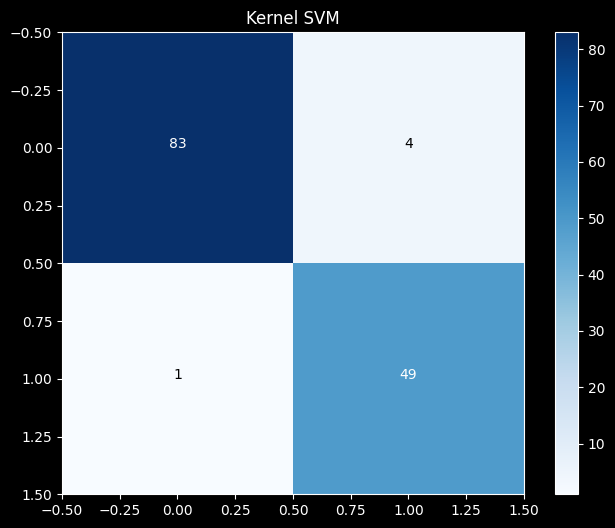

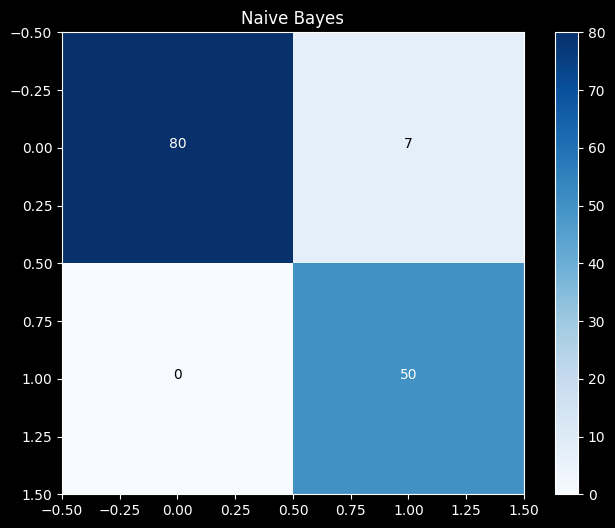

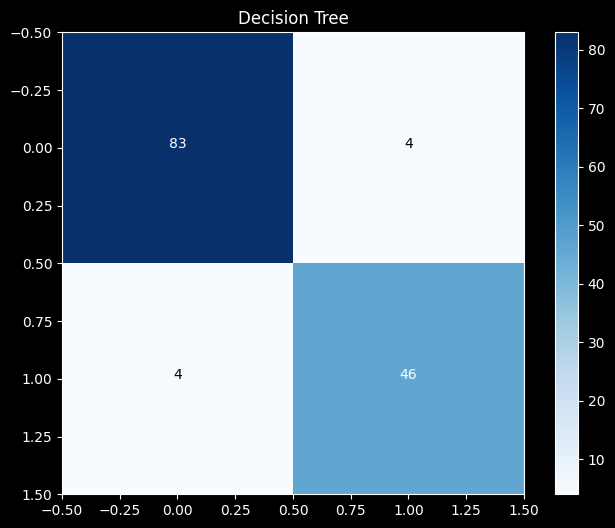

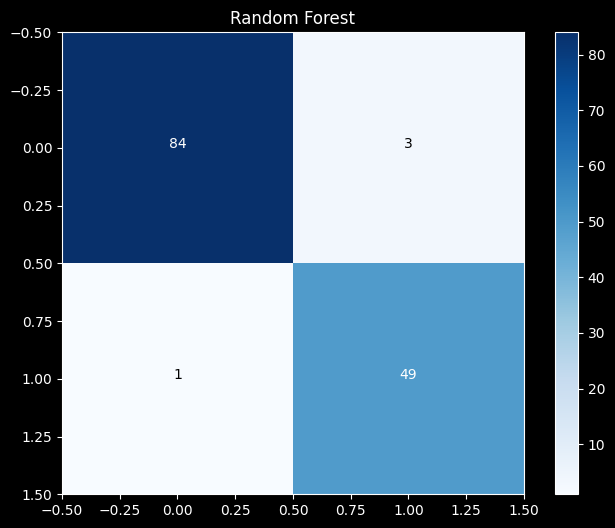

In [84]:

for k,l in Confusion_Matrix_main.items():
  cm = l
  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(k)
  plt.colorbar()
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

In [87]:
max_key = max(Model_Accuracies,key = Model_Accuracies.get)
print(f"The Maximum accuracy is achieved by {max_key} Model having an accuracy of {Model_Accuracies[max_key]:.2f} %")

The Maximum accuracy is achieved by K Nearest Neighbors Model having an accuracy of 97.44 %
